# Cat or Dog Predictor Project

We have data set of 8000 images of cats and dogs as training set and 2000 images as test set and 4 images as model verification set.
We create a Convolution Neural Network to predict whether the image shown is of a cat or a dog.

### Importing the libraries

In [1]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [2]:
tf.__version__

'2.3.0'

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


## Part 1 - Data Preprocessing

### Preprocessing the Training set

In [4]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,)
training_set = train_datagen.flow_from_directory('/content/drive/My Drive/dataset/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary',)

Found 8010 images belonging to 2 classes.


### Preprocessing the Test set

In [5]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('/content/drive/My Drive/dataset/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 2000 images belonging to 2 classes.


## Part 2 - Building the CNN

### Initialising the CNN

In [6]:
cnn = tf.keras.models.Sequential()

### Step 1 - Convolution

In [7]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

### Step 2 - Pooling

In [8]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Adding a second convolutional layer

In [9]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Step 3 - Flattening

In [10]:
cnn.add(tf.keras.layers.Flatten())

### Step 4 - Full Connection

In [11]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

### Step 5 - Output Layer

In [12]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Part 3 - Training the CNN

### Compiling the CNN

In [13]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Training the CNN on the Training set and evaluating it on the Test set

In [14]:
cnn.fit(x = training_set, validation_data = test_set, epochs = 25)

Epoch 1/25
251/251 [==============================] - 2244s 9s/step - loss: 0.6811 - accuracy: 0.5629 - val_loss: 0.6510 - val_accuracy: 0.6200
Epoch 2/25
251/251 [==============================] - 91s 364ms/step - loss: 0.6408 - accuracy: 0.6412 - val_loss: 0.6160 - val_accuracy: 0.6860
Epoch 3/25
251/251 [==============================] - 92s 365ms/step - loss: 0.6077 - accuracy: 0.6735 - val_loss: 0.5878 - val_accuracy: 0.7070
Epoch 4/25
251/251 [==============================] - 93s 370ms/step - loss: 0.5655 - accuracy: 0.7069 - val_loss: 0.5826 - val_accuracy: 0.7005
Epoch 5/25
251/251 [==============================] - 91s 364ms/step - loss: 0.5408 - accuracy: 0.7260 - val_loss: 0.5550 - val_accuracy: 0.7175
Epoch 6/25
251/251 [==============================] - 92s 365ms/step - loss: 0.5152 - accuracy: 0.7454 - val_loss: 0.5305 - val_accuracy: 0.7415
Epoch 7/25
251/251 [==============================] - 92s 368ms/step - loss: 0.4861 - accuracy: 0.7628 - val_loss: 0.4937 - val_acc

The accuracy of the model on the test set 79.2%, which is pretty good.


## Part 4 - Making a single prediction

In [33]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('/content/drive/My Drive/dataset/single_prediction/cat_or_dog_1.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'dog'
else:
  prediction = 'cat'

In [34]:
print(prediction)

dog


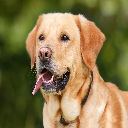

In [35]:
display(image.load_img('/content/drive/My Drive/dataset/single_prediction/cat_or_dog_1.jpg', target_size = (128, 128)))

As we can see, the model pridicted this image perfectly.

In [37]:
test_image = image.load_img('/content/drive/My Drive/dataset/single_prediction/cat_or_dog_2.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'dog'
else:
  prediction = 'cat'

In [38]:
print(prediction)

dog


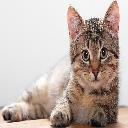

In [40]:
display(image.load_img('/content/drive/My Drive/dataset/single_prediction/cat_or_dog_2.jpg', target_size = (128, 128)))

The model predicted this image incorrectly, as it's accuracy is 79.4%, it does makes mistakes sometimes.

In [46]:
test_image = image.load_img('/content/drive/My Drive/dataset/single_prediction/cat_or_dog_3.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'dog'
else:
  prediction = 'cat'

In [47]:
print(prediction)

dog


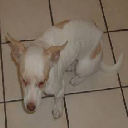

In [48]:
display(image.load_img('/content/drive/My Drive/dataset/single_prediction/cat_or_dog_3.jpg', target_size = (128, 128)))

The model also predicted this image correctly.

In [43]:
test_image = image.load_img('/content/drive/My Drive/dataset/single_prediction/cat.4325.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'dog'
else:
  prediction = 'cat'

In [44]:
print(prediction)

cat


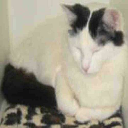

In [50]:
display(image.load_img('/content/drive/My Drive/dataset/single_prediction/cat_or_dog_4.jpg', target_size = (128, 128)))

The model also predicted this image correctly.